# StratoPy Tutorial

The first step is to install stratopy. To install it, on a terminal run

```console
$ pip install stratopy
```

After installing, the first thing to do is to load the stratopy package. 

## The stratopy package

We always recommend to read the documentation.

In [1]:
import stratopy

print(stratopy.__doc__)

A Python package designed to easily manipulate CloudSat and GOES-R
and generate labeled images containing cloud types.

It consists in five modules:

- stratopy.cloudsat module
- stratopy.core module
- stratopy.goes module
- stratopy.io module

 


This tutorial will guide you through all five modules.

## Using the IO Module: Downloading data

Stratopy is intended to be used by data scientists that are interested in trainning (supervised) machine learning algorithms based on satellite imagery data. Stratopy grants the possibility of downloading images from remote servers via the IO module.

In case of having access to CloudSat's remote server, then by defining your username and password as strings and by passing the route to the desired image it is possible to download it (insert your username and password). In case you have not created an user yet, you can do it in [CloudSat Webpage](https://www.cloudsat.cira.colostate.edu/accounts/signup/). 

In [2]:
from stratopy import IO

username = "your.username"
password = "your.password"
route = "2B-CLDCLASS.P1_R05/2019/003/2019003151948_67564_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf"

IO.fetch_cloudsat(
    dirname=route,
    user=username,
    passwd=password,
    host="ftp.cloudsat.cira.colostate.edu",
    tag="stratopy-cloudsat",
)

,read_time,Longitude,Latitude,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9
0,2019-01-03 15:19:58.450000000,156.896011,-0.006094,0,0,0,0,0,0,0,0,0,0
1,2019-01-03 15:19:58.609999967,156.893967,-0.015801,0,0,0,0,0,0,0,0,0,0
2,2019-01-03 15:19:58.769999933,156.891907,-0.025507,0,0,0,0,0,0,0,0,0,0
3,2019-01-03 15:19:58.929999900,156.889862,-0.035213,0,0,0,0,0,0,0,0,0,0
4,2019-01-03 15:19:59.089999986,156.887802,-0.044920,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36945,2019-01-03 16:58:29.651171875,132.272720,0.043348,0,0,0,0,0,0,0,0,0,0
36946,2019-01-03 16:58:29.810839844,132.270676,0.033642,0,0,0,0,0,0,0,0,0,0
36947,2019-01-03 16:58:29.970996094,132.268616,0.023935,0,0,0,0,0,0,0,0,0,0
36948,2019-01-03 16:58:30.131152344,132.266571,0.014229,0,0,0,0,0,0,0,0,0,0


This downloads the file to your computer and returns a Pandas Dataframe object containing the most relevant information (to our ends) extracted from the file. Let's see what is the content of each column:

- **read_time:** Is the UTC time at which the data was taken by the radar.
- **Longitude:** The "longitude" coordinate where the data were taken (in degrees)
- **Latitude:** The "latitude" coordinate where the data were taken (in degrees)
- **layer_0:** It indicates the type of cloud detected in the highest layer of clouds in the atomosphere that the radar could detect (Int) . . .
- **layer_9:** It indicates the type of cloud detected in the lowes layer of clouds in the atomosphere that the radar could detect (Int)

The interpretation code for the types of clouds is the following:

0  $\rightarrow$ no clouds

1 $\rightarrow$ As

2 $\rightarrow$ Ac

3 $\rightarrow$ Cu

4 $\rightarrow$ St

5 $\rightarrow$ Sc

6 $\rightarrow$ Ci

7 $\rightarrow$ Ns

8 $\rightarrow$ DC

Refer to World [Meteorological Organization](https://cloudatlas.wmo.int/en/principles-of-cloud-classification-genera.html) if you'd like to know more about clouds clasification.

## Loading data

If data is already present in your local computer, there is no need to use the IO module. The `cloudsat` and `goes` modules assists the user in loading the satellite image.

### Using the Cloudsat Module


This module may be used to load a Cloudsat image. For this tutorial, there is a data folder in the stratopy data directory that will be used. To load a cloudsat image just import `stratopy.cloudsat`:

In [3]:
from stratopy import cloudsat as cs

print(cs.__doc__)

Module containing all CloudSat satellite related classes and methods.


Then, using the `cs.read_hdf` method, one can simply import the hdf data as follows:

In [4]:
cloudsat_im_path = '../../data/CloudSat/2019002175851_67551_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf'
cloudsat_obj = cs.read_hdf(cloudsat_im_path)

It is posible to crop the image to a desired rectangle with defined latitude and longitude coordinates using the .`cut()` method. For that, you shall provide to the `.cut()` method a list containing:

[Southern latitude, Northern Latitude, Eastern Longitude, Western Longitude]


![america](america.png)


In [5]:
cloudsat_obj = cloudsat_obj.cut([-40.,10., -78.,-36])

### Using the GOES Module

If GOES satellite data is present in the local machine, one may import the goes module from stratopy:

In [6]:
from stratopy import goes

print(goes.__doc__)

Module containing all GOES satellite related classes and methods.


This package is only meant to process CMI (Cloud and Moisture) Full Disk products (Level 2) from GOES-16. That said, in order to load a file you can simply use the `goes.read_nc` method. Here you have three options:

- You can open a single channel file.
- You can open three channels all-togheter: C03, CH7 and CH13. These are used to create a Day Microphysycs RGB.
- You can open a multi-band CMI file (MCMIPF), which contains all 16 abi bands processed as a CMI product.

Opening One Channel Of A CMI Image


In [13]:
goes_path_1 = ("../../data/GOES16/OR_ABI-L2-CMIPF-M3C07_G16_s20190021800363_e20190021811141_c20190021811202.nc",)
goes_obj_1 = goes.read_nc(goes_path_1)

Opening Three Channels in a row

If you'd like to open 3 bands (in order to generate the day microphysics RGB later), we just add the three paths to the path tuple and use the read_nc function:

In [7]:
goes_path_3 = ("../../data/GOES16/OR_ABI-L1b-RadF-M6C07_G16_s20191400530366_e20191400540086_c20191400540122.nc",) #este no anda
goes_path_3 = ("../../data/GOES16/OR_ABI-L2-CMIPF-M3C07_G16_s20190021800363_e20190021811141_c20190021811202.nc",)
goes_obj = goes.read_nc(goes_path_3)

Now, using goes_obj_3 it's possible to easily generate a Day Microphysics RGB product, where the Reds channel is composed by band 3, the Greens channel is composed by band 7 and the Blues channel is composed by band 13, by simply using the RGB method. This will return a numpy array of shape (a,l,3) where ...The default shape is (2441, 1666, 3) and includes a great portion of Southamerica.

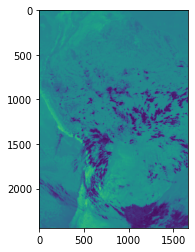

In [18]:
from matplotlib import pyplot as plt

rgb_img = goes_obj.RGB

#Plot the image 
plt.imshow(rgb_img[0])

Multi-band file
In GOES images it is also possible to trim the image to a specified rectangle:

You can always change the coordinates where you are trimming the Full-Disk image by....

In [8]:
# Return a dictionary
goes_cut = goes_obj.trim()

# Return the image array 
goes_array = goes_cut.get('M3C03')

## Merging data from GOES and CloudSat

In [9]:
from stratopy import core

print(core.__doc__)

Contains methods to perform transformation operations on loaded images.


In order to merge data from GOES16 and Cloudsat, we must have preaviously created a *goes object* and a *cloudsat object*. 

In [10]:
merged_df = stratopy.core.merge(cloudsat_obj, goes_obj)

As we can see, this returns a .... object.\
This object inherits all the functionalities of a Pandas Dataframe object. 

In [11]:
(merged_df), merged_df

(                          read_time  Longitude   Latitude  layer_0  \
 14474 2019-01-02 18:37:37.580087891 -65.910103 -38.879375        5   
 14475 2019-01-02 18:37:37.740000000 -65.913040 -38.869797        5   
 14541 2019-01-02 18:37:48.300058594 -66.105583 -38.237446        5   
 14542 2019-01-02 18:37:48.459970703 -66.108482 -38.227863        5   
 14543 2019-01-02 18:37:48.619882812 -66.111382 -38.218281        5   
 ...                             ...        ...        ...      ...   
 19246 2019-01-02 18:50:21.100107422 -76.740425   7.254056        5   
 19247 2019-01-02 18:50:21.260019531 -76.742500   7.263758        5   
 19248 2019-01-02 18:50:21.419931641 -76.744576   7.273460        5   
 19249 2019-01-02 18:50:21.580087891 -76.746651   7.283162        5   
 19250 2019-01-02 18:50:21.740000000 -76.748726   7.292864        5   
 
             col_row                                           goes_vec  
 14474  (3086, 4613)  [[[0.6998559236526489], [0.699249267578125], [... 

The goes_vect colum is the column that contains a vector of shape *3x3xN* where N could be 
- 1 if the goes object corresponds to a one-band file (CMI)
- 3 if the goes object corresponds to a 3-band file (RGB)(CMI)
- 16 if the goes object corresponds to a 16-band file (MCMIPF)

In [12]:
merged_df['goes_vec'].iloc[0].shape

(3, 3, 1)

## Understanding the core Module


This module is usefull to perform coordinate changes.

The available coordinate systems here are:

- Mercator projection (lat,lon): Is the system used in CloudSat's files
- GOES geostationary system: Is the natural system in which each one of the pixels in a GOES image can be located
- Scan coordinates (sx,sy,sz): Is the natural system to locate GOES satellite respect to Earth's surface

In [19]:
from stratopy import core

print(core.__doc__)

Contains methods to perform transformation operations on loaded images.


Let's see some simple examples. If you would like to transform a (lat,lon) coordinate into a GOES geostationary coordinate (as the merger method does internally) you need to:

- Step 1: transform mercator projection into scan projection (lat,lon) -> (sx,sy,sz)

In [22]:
(sx, sy, sz) = core.latlon2scan(0.5, -75.0)

ValueError: not enough values to unpack (expected 3, got 2)

Step 2: transform the scan projection into GOES geostationary projection

In [23]:
(col, row) = core.scan2colfil(sx,sy,sz)

NameError: name 'sz' is not defined

This returns the column (col) and row of a GOES-16 image where an object located in latitude = 0.5° and Longitude=-75.0° would be.

Notice that as the GOES-16 Full Disk products are restricted to the American continent, this methods only works for latitudes and longitudes contained in those limits.

The methods in this modules doesn't only work for tuples, they also work in numpy arrays of 1 and 2 dimentions (matrix).